In [1]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

In [32]:
colors=['#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4']
colors_single = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']
colors_single.reverse()

In [62]:
cnst2_first=[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
vals0=nmr.Experiment(447).load_tpc3d()

cnst2_rest=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]
vals45=nmr.Experiment(408).load_tpc3d()
vals90=nmr.Experiment(407).load_tpc3d()
vals135=nmr.Experiment(419).load_tpc3d()
vals180=nmr.Experiment(414).load_tpc3d()

In [3]:
vals=nmr.Experiment(447).load_tpc3d()
kicks=list(range(vals.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]

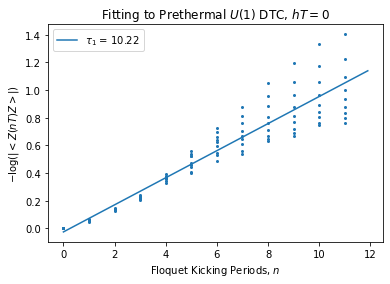

In [49]:
x_fit = []
y_fit = []
cut=12
for idx in range(2,len(cnst2)):
    x_fit.extend(kicks[0:cut])
    y_fit.extend(-np.log(abs(vals[idx,0:cut])))
p = np.polyfit(x_fit,y_fit,1)

x1 = np.arange(0,kicks[cut],.1)
f1 = p[0]*x1+p[1]

plt.scatter(x_fit,y_fit,s=4)
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p[0]))
plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=0$")
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log(|<Z(nT)Z>|)$")
plt.show()

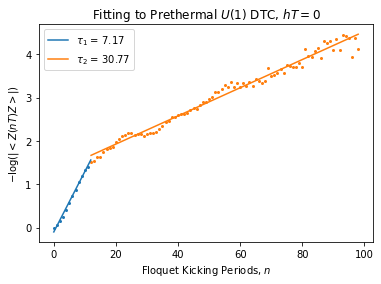

In [20]:
x=kicks
y=-np.log(abs(vals[2]))
cut = 12

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut],.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut],x[-1],1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=0$")
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log(|<Z(nT)Z>|)$")
plt.show()

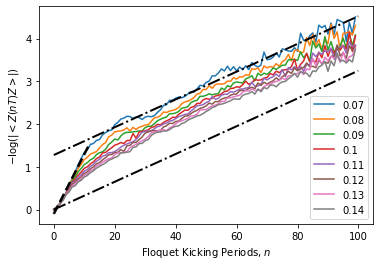

In [36]:
plt.plot(-np.log(abs(vals[2:-1].transpose())),label=cnst2[2:-1])
x=np.arange(0,100,.1)
plt.plot(x,x*p2[0],'k-.',linewidth=2)
plt.plot(x,x*p2[0]+p2[1],'k-.',linewidth=2)
plt.plot(x1,f1,'k--',linewidth=2.5)
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log(|<Z(nT)Z>|)$")
#plt.title(r"Fitting to Prethermal U(1) DTC, $hT=0$, various $u$")
plt.show()

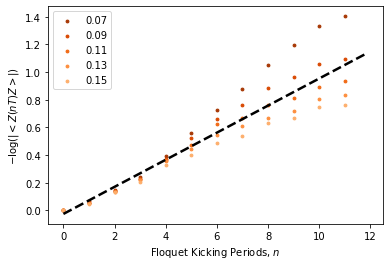

In [59]:
for idx in range(2,len(cnst2),2):
    plt.scatter(kicks[0:cut],-np.log(abs(vals[idx,0:cut])),label=cnst2[idx], color=colors_single[int(idx/2)],s=8)

x=np.arange(0,cut,.1)
plt.plot(x1,f1,'k--',linewidth=2.5)
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log(|<Z(nT)Z>|)$")
#plt.title(r"Fitting to Prethermal U(1) DTC, $hT=0$, various $u$")
plt.savefig("early_fit.pdf")
plt.show()

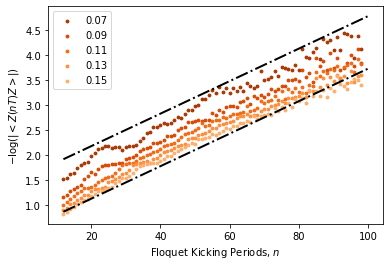

In [61]:
for idx in range(2,len(cnst2),2):
    plt.scatter(x2, -np.log(abs(vals[idx,cut:-1])),label=cnst2[idx], color=colors_single[int(idx/2)],s=8)

x=np.arange(cut,100,.1)
plt.plot(x,x*p2[0]+p2[1]+.25,'k-.',linewidth=2)
plt.plot(x,x*p2[0]+p2[1]-.8,'k-.',linewidth=2)
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log(|<Z(nT)Z>|)$")
#plt.title(r"Fitting to Prethermal U(1) DTC, $hT=0$, various $u$")
plt.savefig("late_fit.pdf")
plt.show()